<a href="https://colab.research.google.com/github/kuangzy2011/datasets/blob/main/coco128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard 886f1c03d839575afecb059accf74296fad395b6

# Download COCO val2017
#!wget -c https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip
#!unzip -q tmp.zip -d ../datasets && rm tmp.zip

!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch


# Download COCO val2017
torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/coco2017val.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../datasets && rm tmp.zip


Cloning into 'yolov5'...
remote: Enumerating objects: 9915, done.
remote: Total 9915 (delta 0), reused 0 (delta 0), pack-reused 9915
Receiving objects: 100% (9915/9915), 10.09 MiB | 8.26 MiB/s, done.
Resolving deltas: 100% (6900/6900), done.
/content/yolov5
HEAD is now at 886f1c0 DDP after autoanchor reorder (#2421)
     |████████████████████████████████| 596 kB 12.2 MB/s 


  0%|          | 0.00/780M [00:00<?, ?B/s]

In [2]:
%ls

sample_data/


In [4]:
!git pull

Updating 886f1c0..3d89798
Fast-forward
 .dockerignore                                      |  10 +-
 .github/FUNDING.yml                                |   5 +
 .github/ISSUE_TEMPLATE/bug-report.md               |  28 +-
 .github/ISSUE_TEMPLATE/feature-request.md          |   4 +-
 .github/ISSUE_TEMPLATE/question.md                 |   1 -
 .github/dependabot.yml                             |  31 +-
 .github/workflows/ci-testing.yml                   |  44 +-
 .github/workflows/codeql-analysis.yml              |  64 +-
 .github/workflows/greetings.yml                    |  30 +-
 .github/workflows/rebase.yml                       |  10 +-
 .github/workflows/stale.yml                        |  26 +-
 .gitignore                                         |  19 +-
 CONTRIBUTING.md                                    |  94 +++
 Dockerfile                                         |  28 +-
 README.md                                          | 362 ++++++---
 data/Argoverse.yaml                    

In [5]:
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-31-g3d89798 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, she

In [17]:
!ls runs/train/exp/

#!cat runs/train/exp/results.csv

confusion_matrix.png				   results.png
events.out.tfevents.1635151957.4f30a40545a5.171.0  train_batch0.jpg
F1_curve.png					   train_batch1.jpg
hyp.yaml					   train_batch2.jpg
labels_correlogram.jpg				   val_batch0_labels.jpg
labels.jpg					   val_batch0_pred.jpg
opt.yaml					   val_batch1_labels.jpg
P_curve.png					   val_batch1_pred.jpg
PR_curve.png					   val_batch2_labels.jpg
R_curve.png					   val_batch2_pred.jpg
results.csv					   weights


In [ ]:
!cat runs/train/exp/results.csv

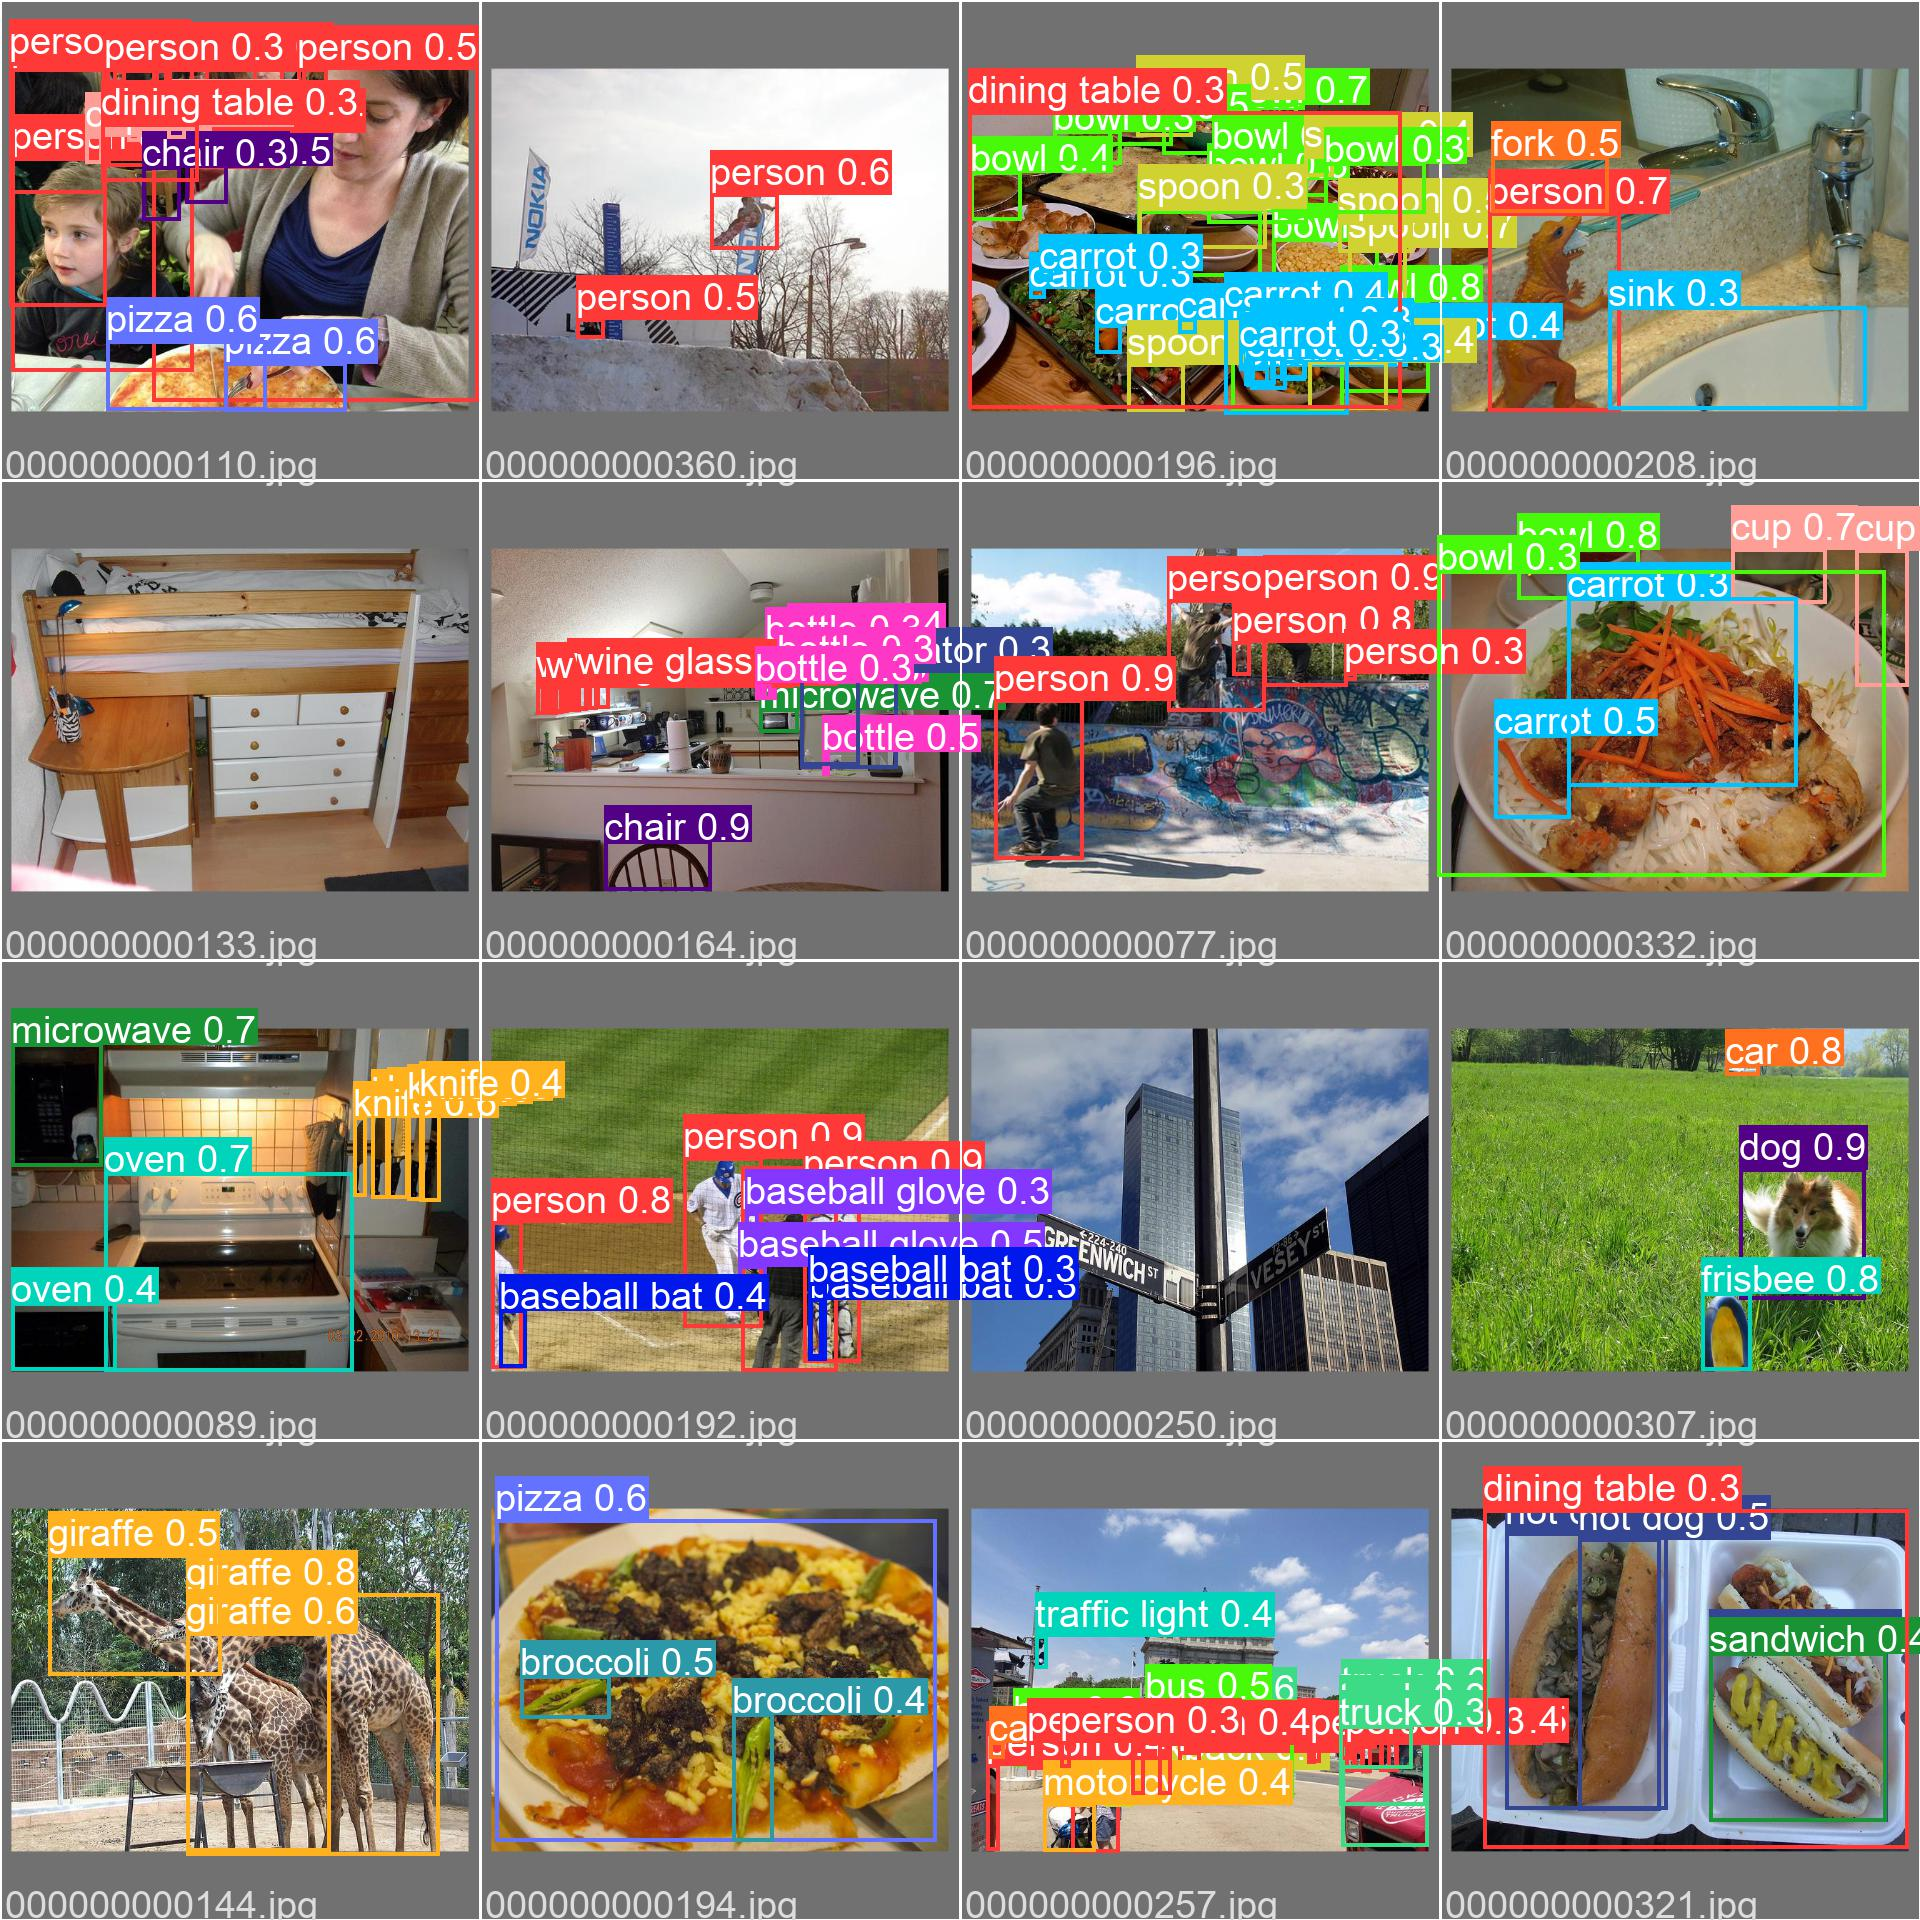

In [28]:
from IPython.display import Image
#from utils.utils import plot_results
#plot_results()
Image(filename='runs/train/exp/val_batch2_pred.jpg', width=600)

detect: weights=['yolov5s.pt'], source=data/images/, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-31-g3d89798 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.033s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 1 tie, Done. (0.030s)
Speed: 0.5ms pre-process, 31.6ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


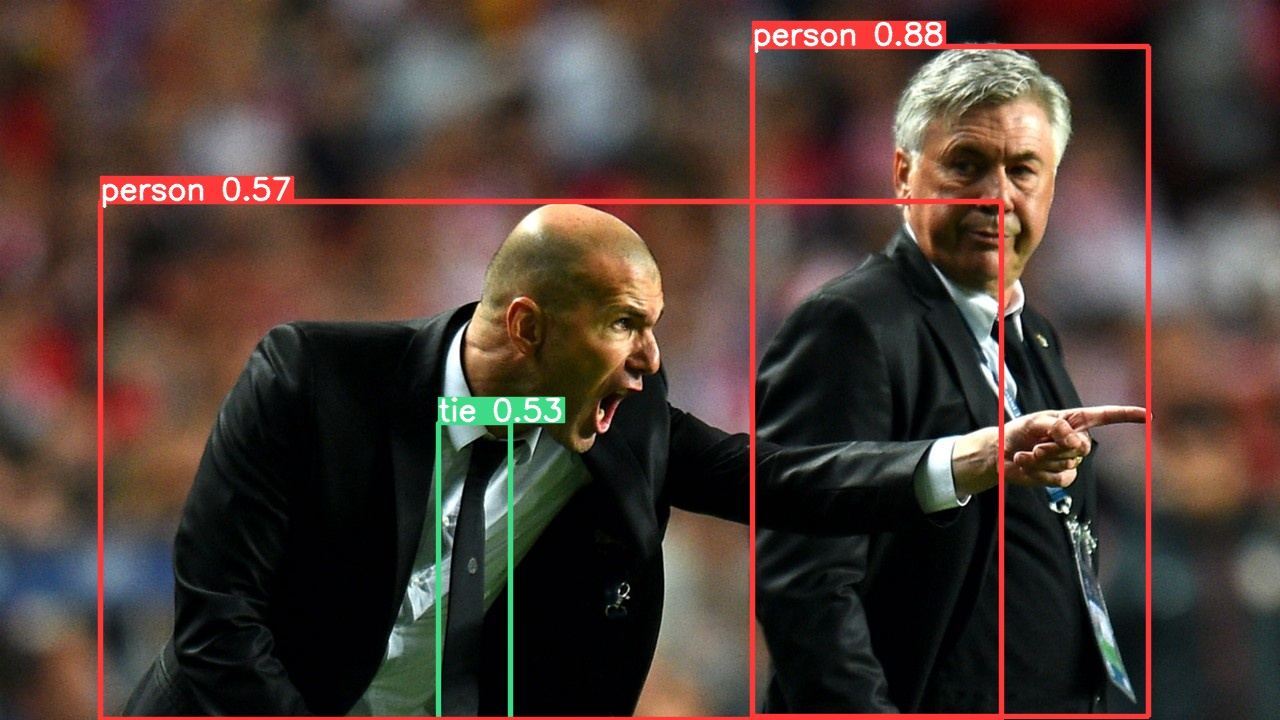

In [7]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/
from IPython.display import Image
Image(filename='runs/train/exp/zidane.jpg', width=600)

In [10]:
!ls data/images

bus.jpg  zidane.jpg


detect: weights=['yolov5s.pt'], source=data/images/bus.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-31-g3d89798 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.033s)
Speed: 0.5ms pre-process, 32.6ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


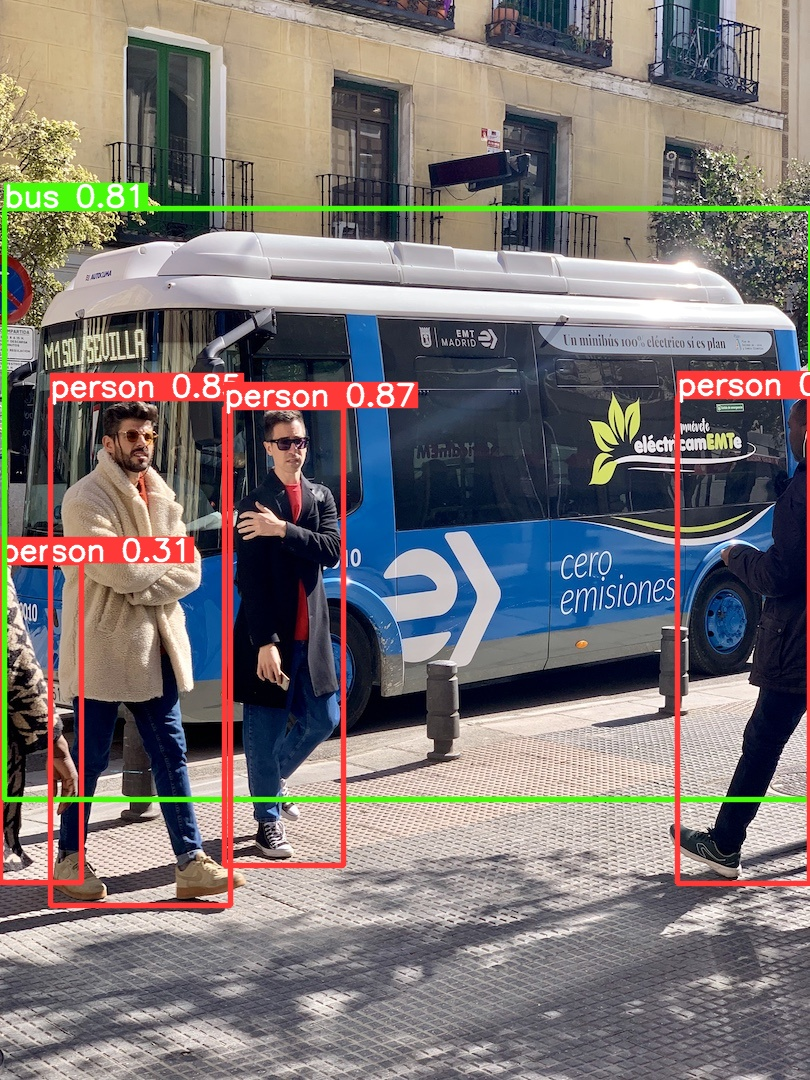

In [11]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/bus.jpg
from IPython.display import Image
Image(filename='runs/detect/exp/bus.jpg', width=600)

In [29]:
!ls runs/train/exp/weights



best.pt  last.pt


detect: weights=['runs/train/exp/weights/last.pt'], source=../datasets/coco128/images/train2017/000000000650.jpg, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-31-g3d89798 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
image 1/1 /content/datasets/coco128/images/train2017/000000000650.jpg: 288x416 1 car, 1 cat, Done. (0.027s)
Speed: 0.4ms pre-process, 27.4ms inference, 1.8ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp10


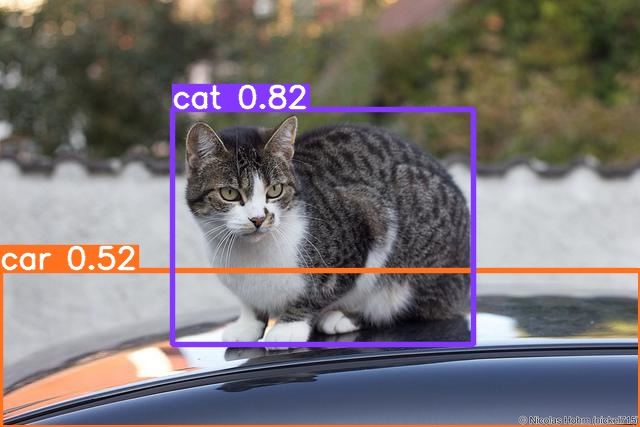

In [36]:
!python detect.py --weights runs/train/exp/weights/last.pt --img 416 --conf 0.4 --source ../datasets/coco128/images/train2017/000000000650.jpg
from IPython.display import Image
Image(filename='runs/detect/exp8/000000000650.jpg', width=600)
Image(filename='runs/detect/exp9/000000000650.jpg', width=600)

In [43]:
!wget -c https://github.com/kuangzy2011/datasets/blob/main/zidane.jpg

--2021-10-25 09:33:35--  https://github.com/kuangzy2011/datasets/blob/main/zidane.jpg
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘zidane.jpg’

zidane.jpg              [ <=>                ] 129.56K  --.-KB/s    in 0.02s   

2021-10-25 09:33:36 (5.61 MB/s) - ‘zidane.jpg’ saved [132670]



In [2]:
!ls 

!pwd

sample_data
/content


In [52]:
#!python detect.py --weights runs/train/exp/weights/last.pt --img 416 --conf 0.4 --source /content/yolov5/zidane.jpg
from IPython.display import Image
#Image(filename='runs/detect/exp11/zidane.jpg', width=600)

!ls -l /content/yolov5/zidane.jpg

Image(filename='/content/yolov5/zidane.jpg', width=600)

-rw-r--r-- 1 root root 132670 Oct 25 09:33 /content/yolov5/zidane.jpg


# 新段落

In [ ]:
python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source ../datasets/coco128/images/train2017/000000000113.jpg --view-img

# 新段落